## Importing Libraries

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# SVC for classification through support vector machine
from sklearn.svm import SVC

# importing train test split & GridSearchCV library
from sklearn.model_selection import train_test_split, GridSearchCV

# model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# standardization library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# pipelline libraray
from sklearn.pipeline import Pipeline

# figure parameters
sns.set_theme(style='darkgrid', palette='Set1')
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 200

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Data Dictionary

- age -- age of a person
- workclass	-- A work class is a grouping of work 
- education	-- Education of an individuals	
- maritalstatus -- Marital status of an individulas	
- occupation	 -- occupation of an individuals
- relationship -- 	
- race --  Race of an Individual
- sex --  Gender of an Individual
- capitalgain --  profit received from the sale of an investment	
- capitalloss	-- A decrease in the value of a capital asset
- hoursperweek -- number of hours work per week	
- native -- Native of an individual
- Salary -- salary of an individual

In [2]:
df = pd.read_csv('SalaryData_Train(1).csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.describe(include = object)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
count,30161,30161,30161,30161,30161,30161,30161,30161,30161
unique,7,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22285,9840,14065,4038,12463,25932,20380,27504,22653


**Missing values check**

In [6]:
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

**checking object type column for inconsistent entries**

In [7]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [8]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [9]:
df['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [10]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [11]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [12]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [13]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [14]:
df['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [15]:
df['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

**Outlier Detection * Handeling**

Text(0.5, 1.0, 'boxplot')

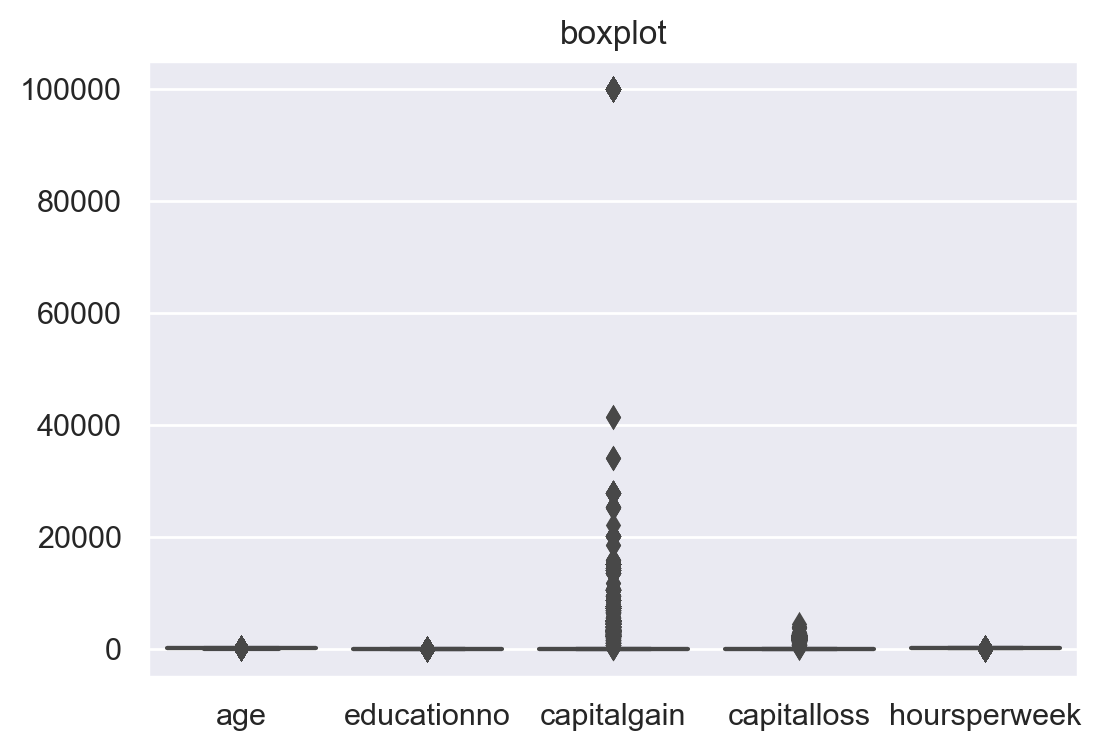

In [16]:
sns.boxplot(data = df)
plt.title('boxplot')

Text(0.5, 1.0, 'zoomed-in boxplot')

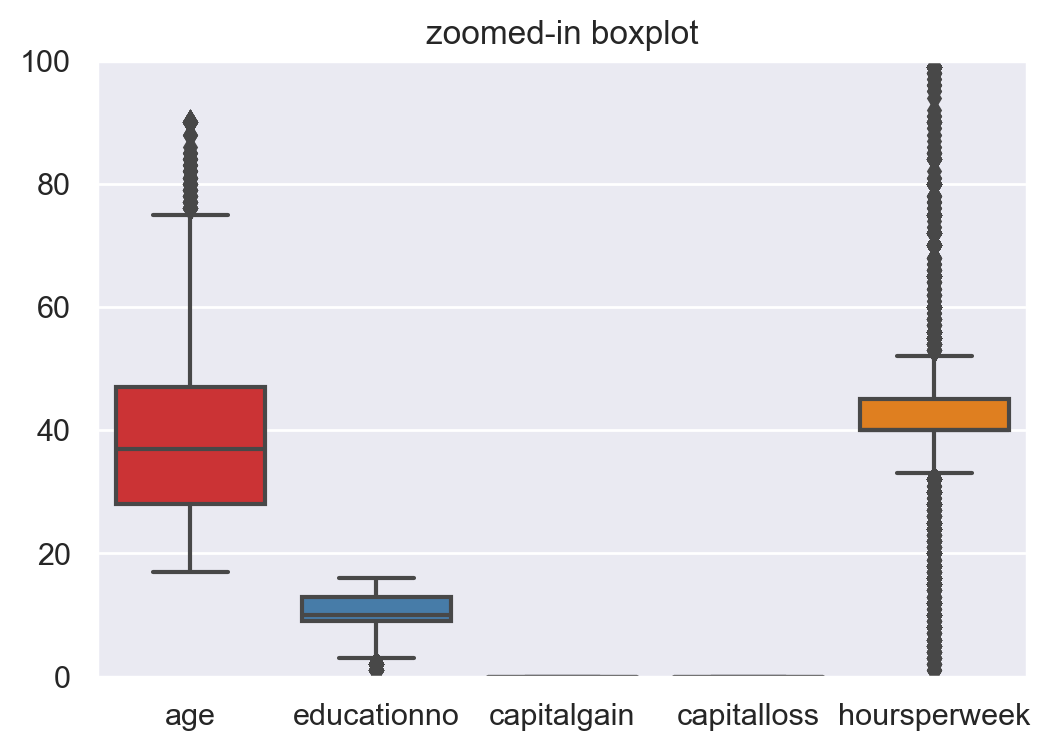

In [17]:
sns.boxplot(data = df)
plt.ylim(0,100)
plt.title('zoomed-in boxplot')

In [18]:
def outlier_remove(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df.loc[df[col]>upper,col] = upper
    df.loc[df[col]<lower,col] = lower
outlier_remove(df = df,col = 'age')
outlier_remove(df = df,col = 'educationno')
outlier_remove(df = df,col = 'capitalgain')
outlier_remove(df = df,col = 'capitalloss')
outlier_remove(df = df,col = 'hoursperweek')

Text(0.5, 1.0, 'outlier removed train data boxplot')

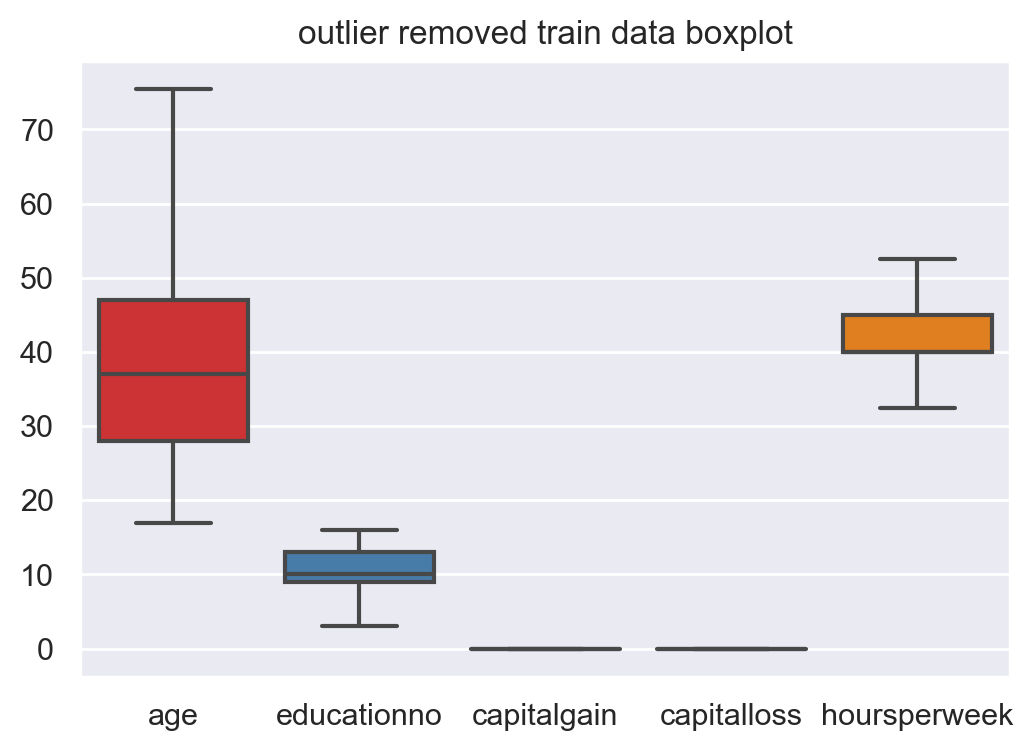

In [19]:
sns.boxplot(data = df)
plt.title('outlier removed train data boxplot')

## Visualizations

In [20]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [21]:
high_sal = df[df['Salary'] == ' >50K']
low_sal = df[df['Salary'] == ' <=50K']

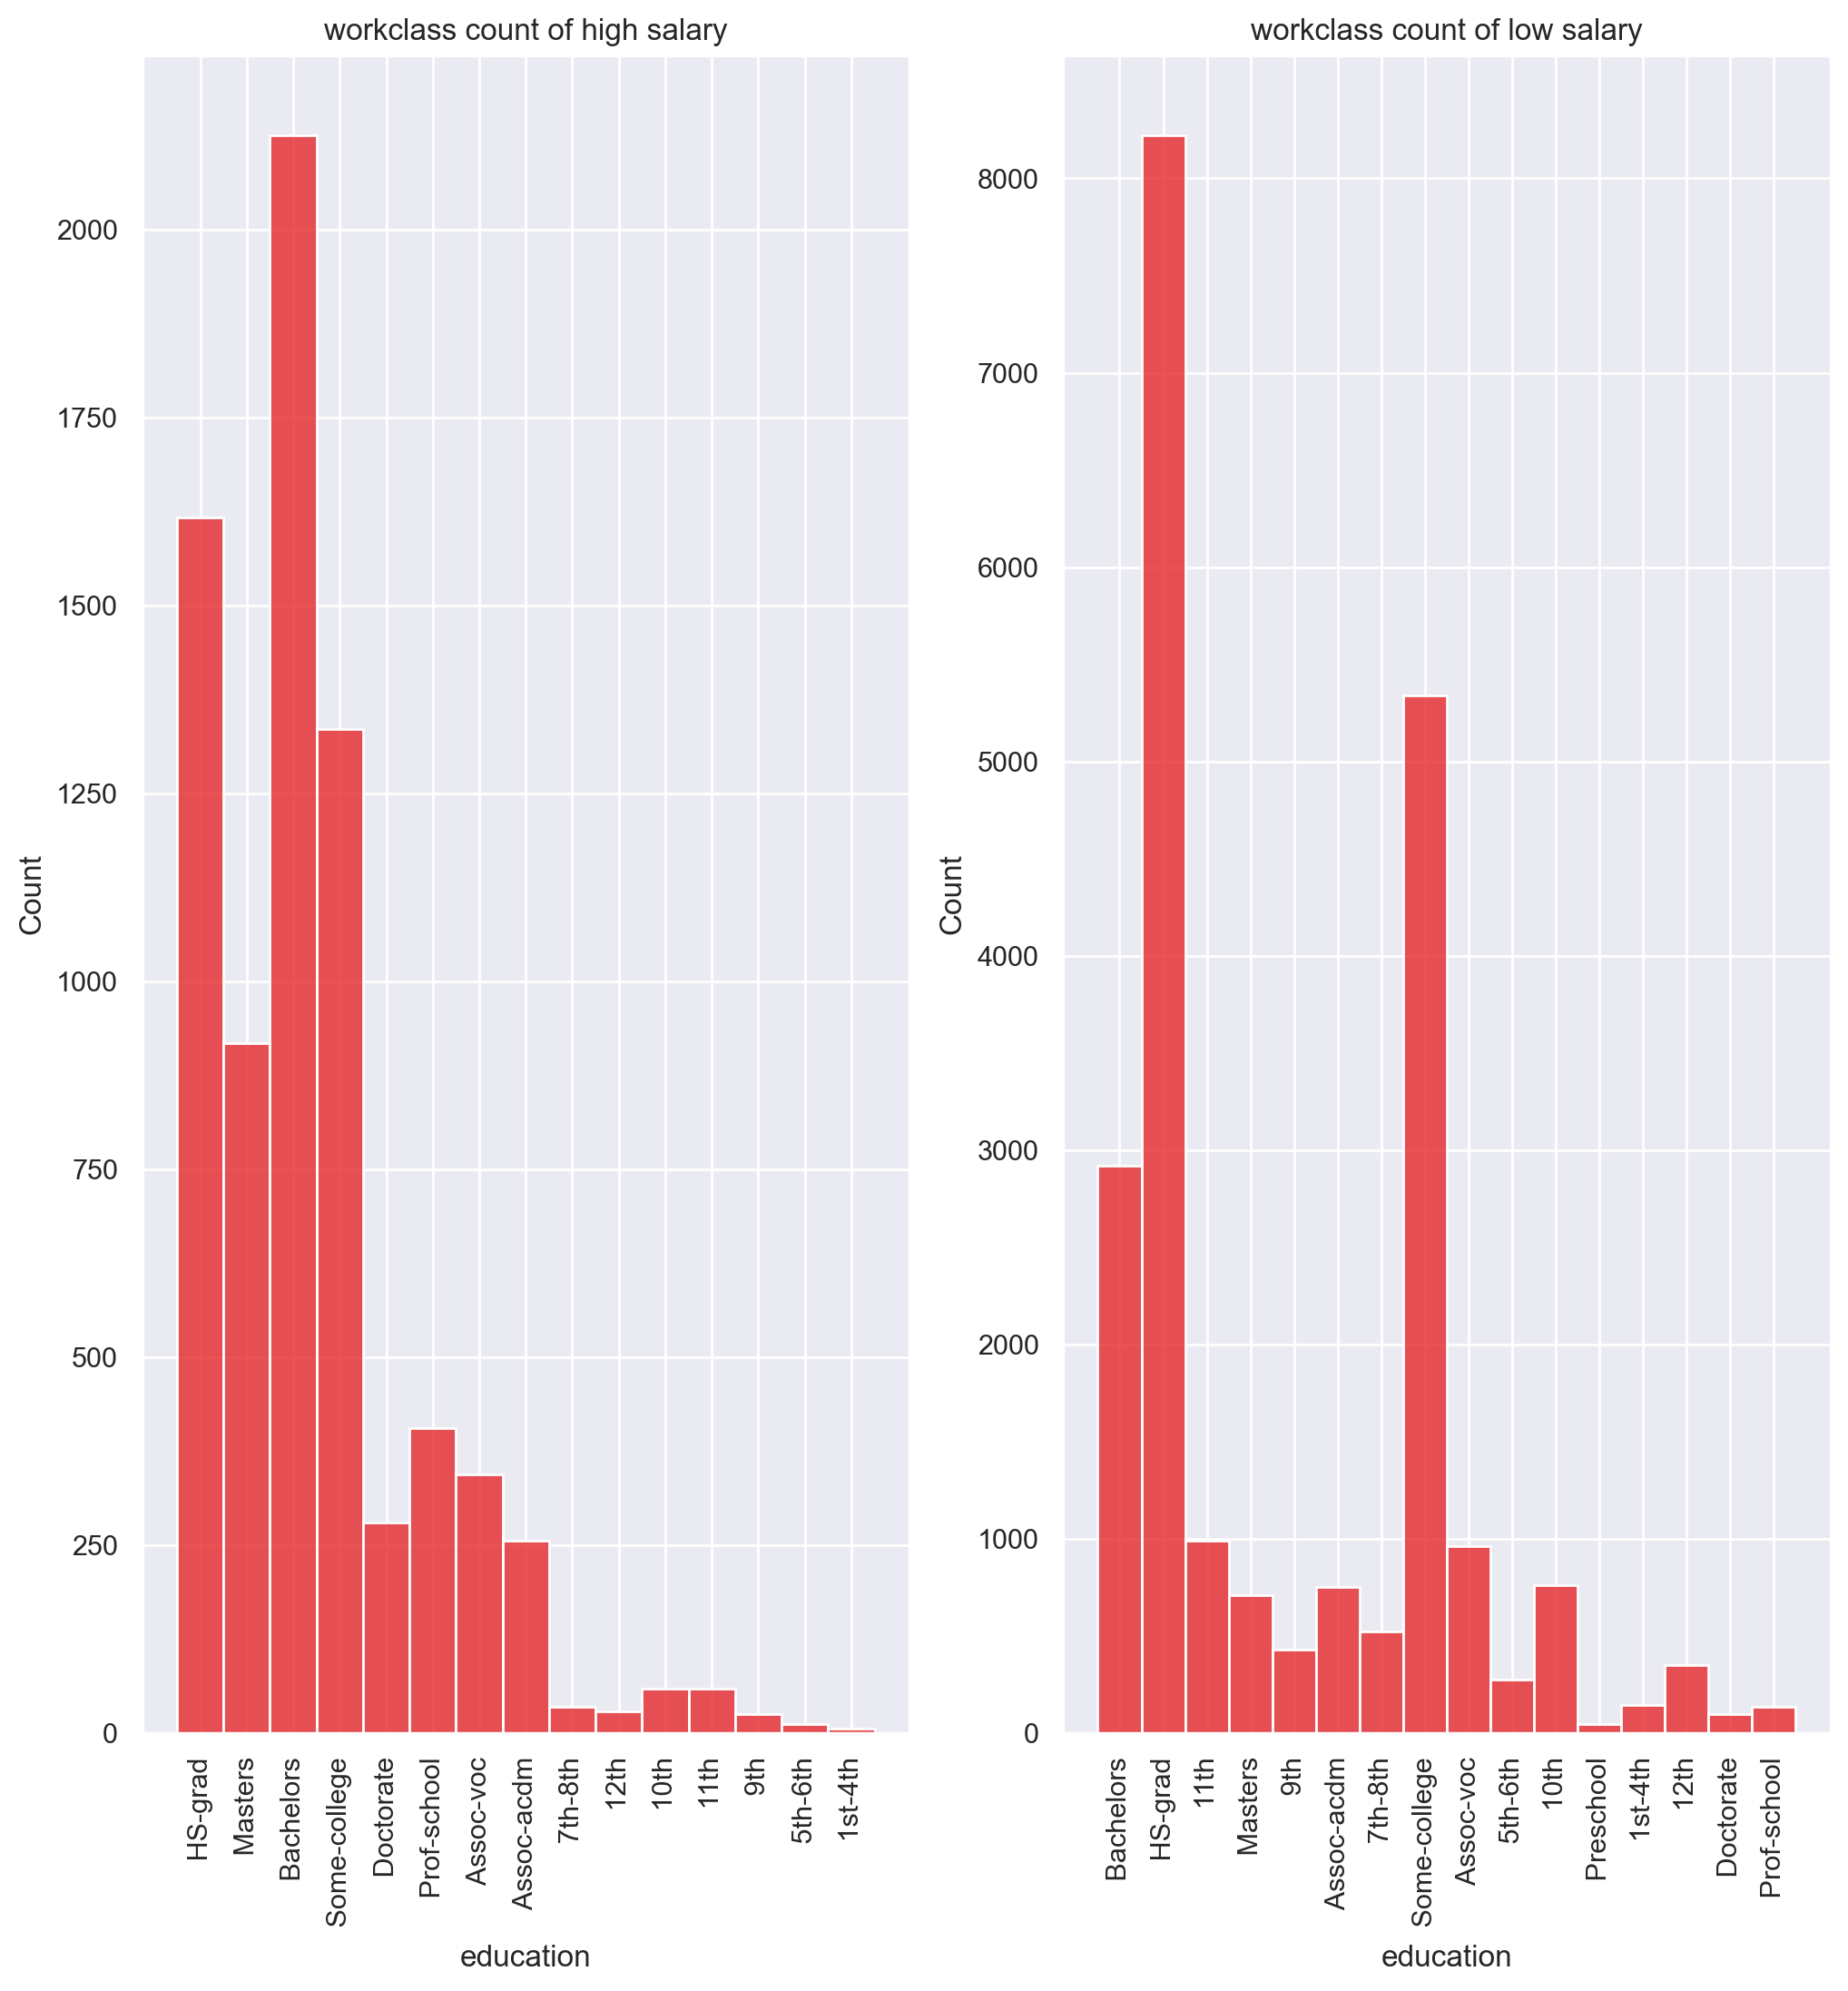

In [22]:
plt.figure(figsize = (12,12))
plt.subplot(1,2,1)
sns.histplot(data = high_sal, x = 'education')
plt.xticks(rotation = 90)
plt.title('workclass count of high salary')

plt.subplot(1,2,2)
sns.histplot(data = low_sal, x = 'education')
plt.xticks(rotation = 90)
plt.title('workclass count of low salary')
plt.show()

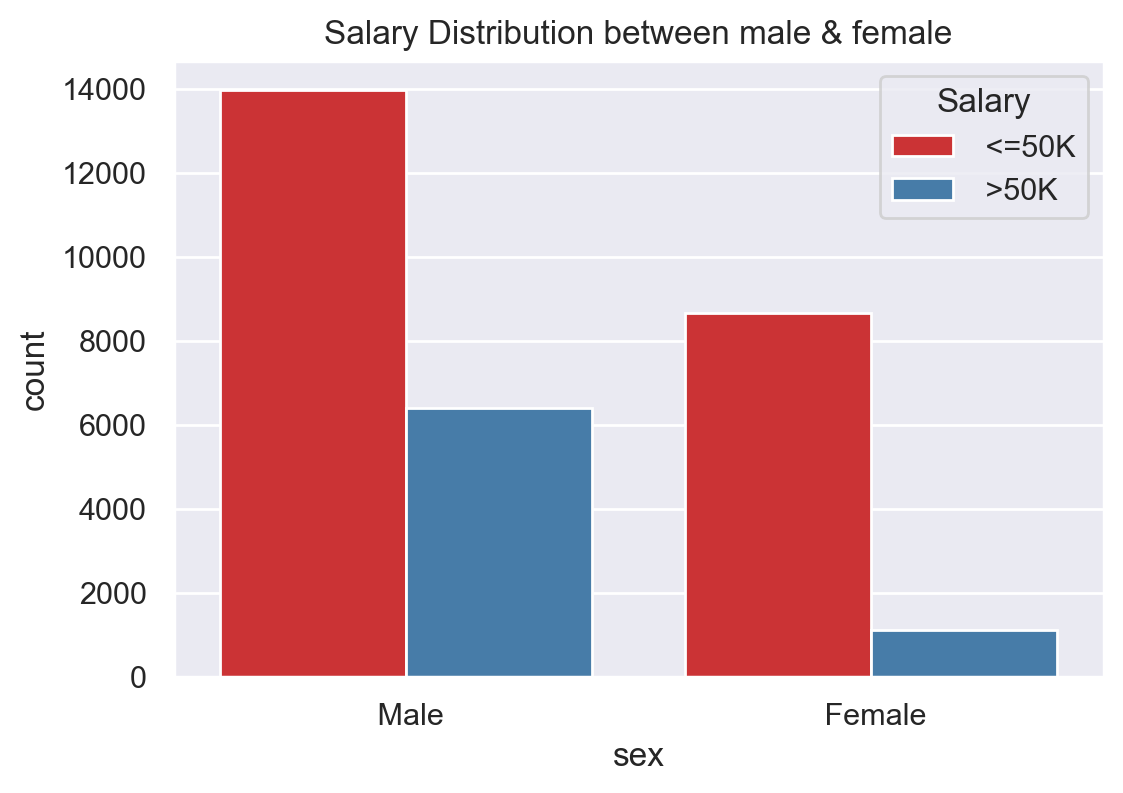

In [23]:
sns.countplot(data = df, x = 'sex', hue = 'Salary')
plt.title('Salary Distribution between male & female')
plt.show()

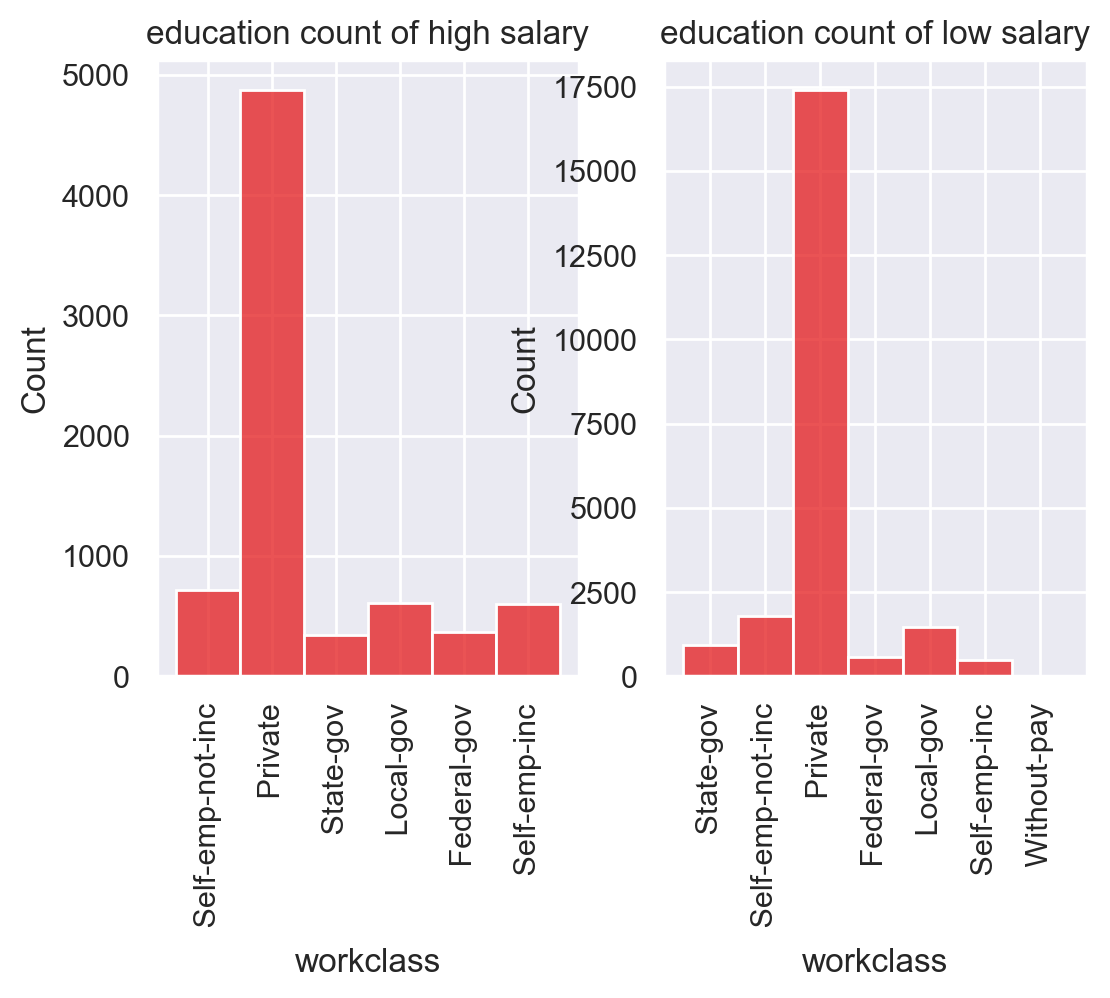

In [24]:
plt.subplot(1,2,1)
sns.histplot(data = high_sal, x = 'workclass')
plt.xticks(rotation = 90)
plt.title('education count of high salary')
plt.subplot(1,2,2)
sns.histplot(data = low_sal, x = 'workclass')
plt.xticks(rotation = 90)
plt.title('education count of low salary')
plt.show()

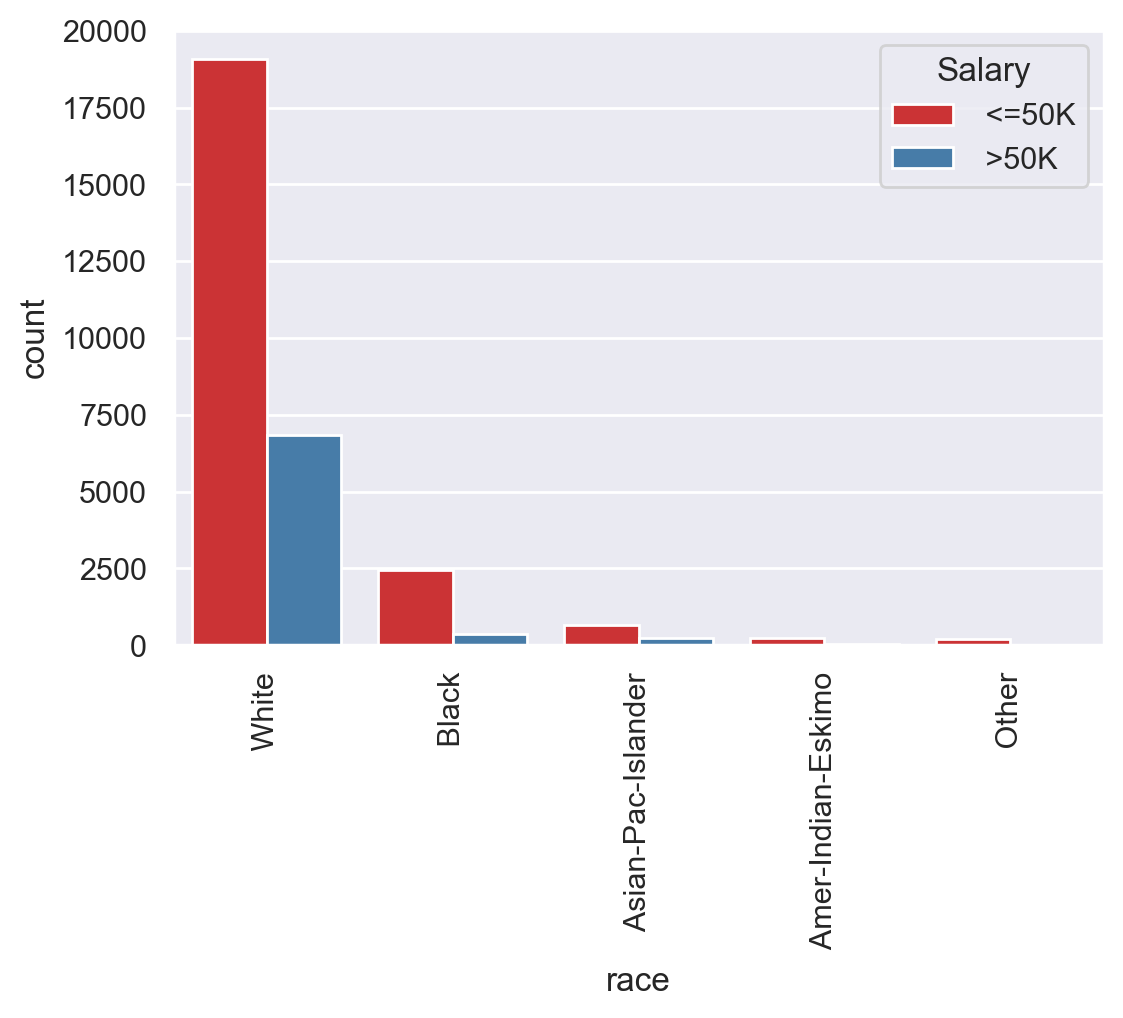

In [25]:
sns.countplot(data = df, x = 'race', hue = "Salary")
plt.xticks(rotation = 90)
plt.show()

**Label Encoding**

In [26]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column contains categorical data
        df[col] = label_encoder.fit_transform(df[col])

In [27]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39.0,5,9,13,4,0,1,4,1,0,0,40.0,37,0
1,50.0,4,9,13,2,3,0,4,1,0,0,32.5,37,0
2,38.0,2,11,9,0,5,1,4,1,0,0,40.0,37,0
3,53.0,2,1,7,2,5,0,2,1,0,0,40.0,37,0
4,28.0,2,9,13,2,9,5,2,0,0,0,40.0,4,0


In [28]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'age': [39.  50.  38.  53.  28.  37.  49.  52.  31.  42.  30.  23.  32.  34.
 25.  43.  40.  54.  35.  59.  56.  19.  20.  45.  22.  48.  21.  24.
 57.  44.  41.  29.  47.  46.  36.  75.5 27.  18.  33.  55.  61.  70.
 64.  71.  66.  51.  58.  26.  17.  60.  75.  65.  62.  63.  67.  74.
 72.  69.  68.  73. ]
Unique values in 'workclass': [5 4 2 0 1 3 6]
Unique values in 'education': [ 9 11  1 12  6 15  7  5 10  8 14  4  0 13  2  3]
Unique values in 'educationno': [13  9  7 14  5 10 12  4 16 11 15  3  6  8]
Unique values in 'maritalstatus': [4 2 0 3 5 1 6]
Unique values in 'occupation': [ 0  3  5  9  7 11 13  4  6 12  2 10  1  8]
Unique values in 'relationship': [1 0 5 3 4 2]
Unique values in 'race': [4 2 1 0 3]
Unique values in 'sex': [1 0]
Unique values in 'capitalgain': [0]
Unique values in 'capitalloss': [0]
Unique values in 'hoursperweek': [40.  32.5 45.  50.  52.5 35.  52.  44.  43.  38.  48.  41.  36.  46.
 42.  34.  33.  47.  37.  39.  49.  51. ]
Unique values in

**Correlation**

<Axes: >

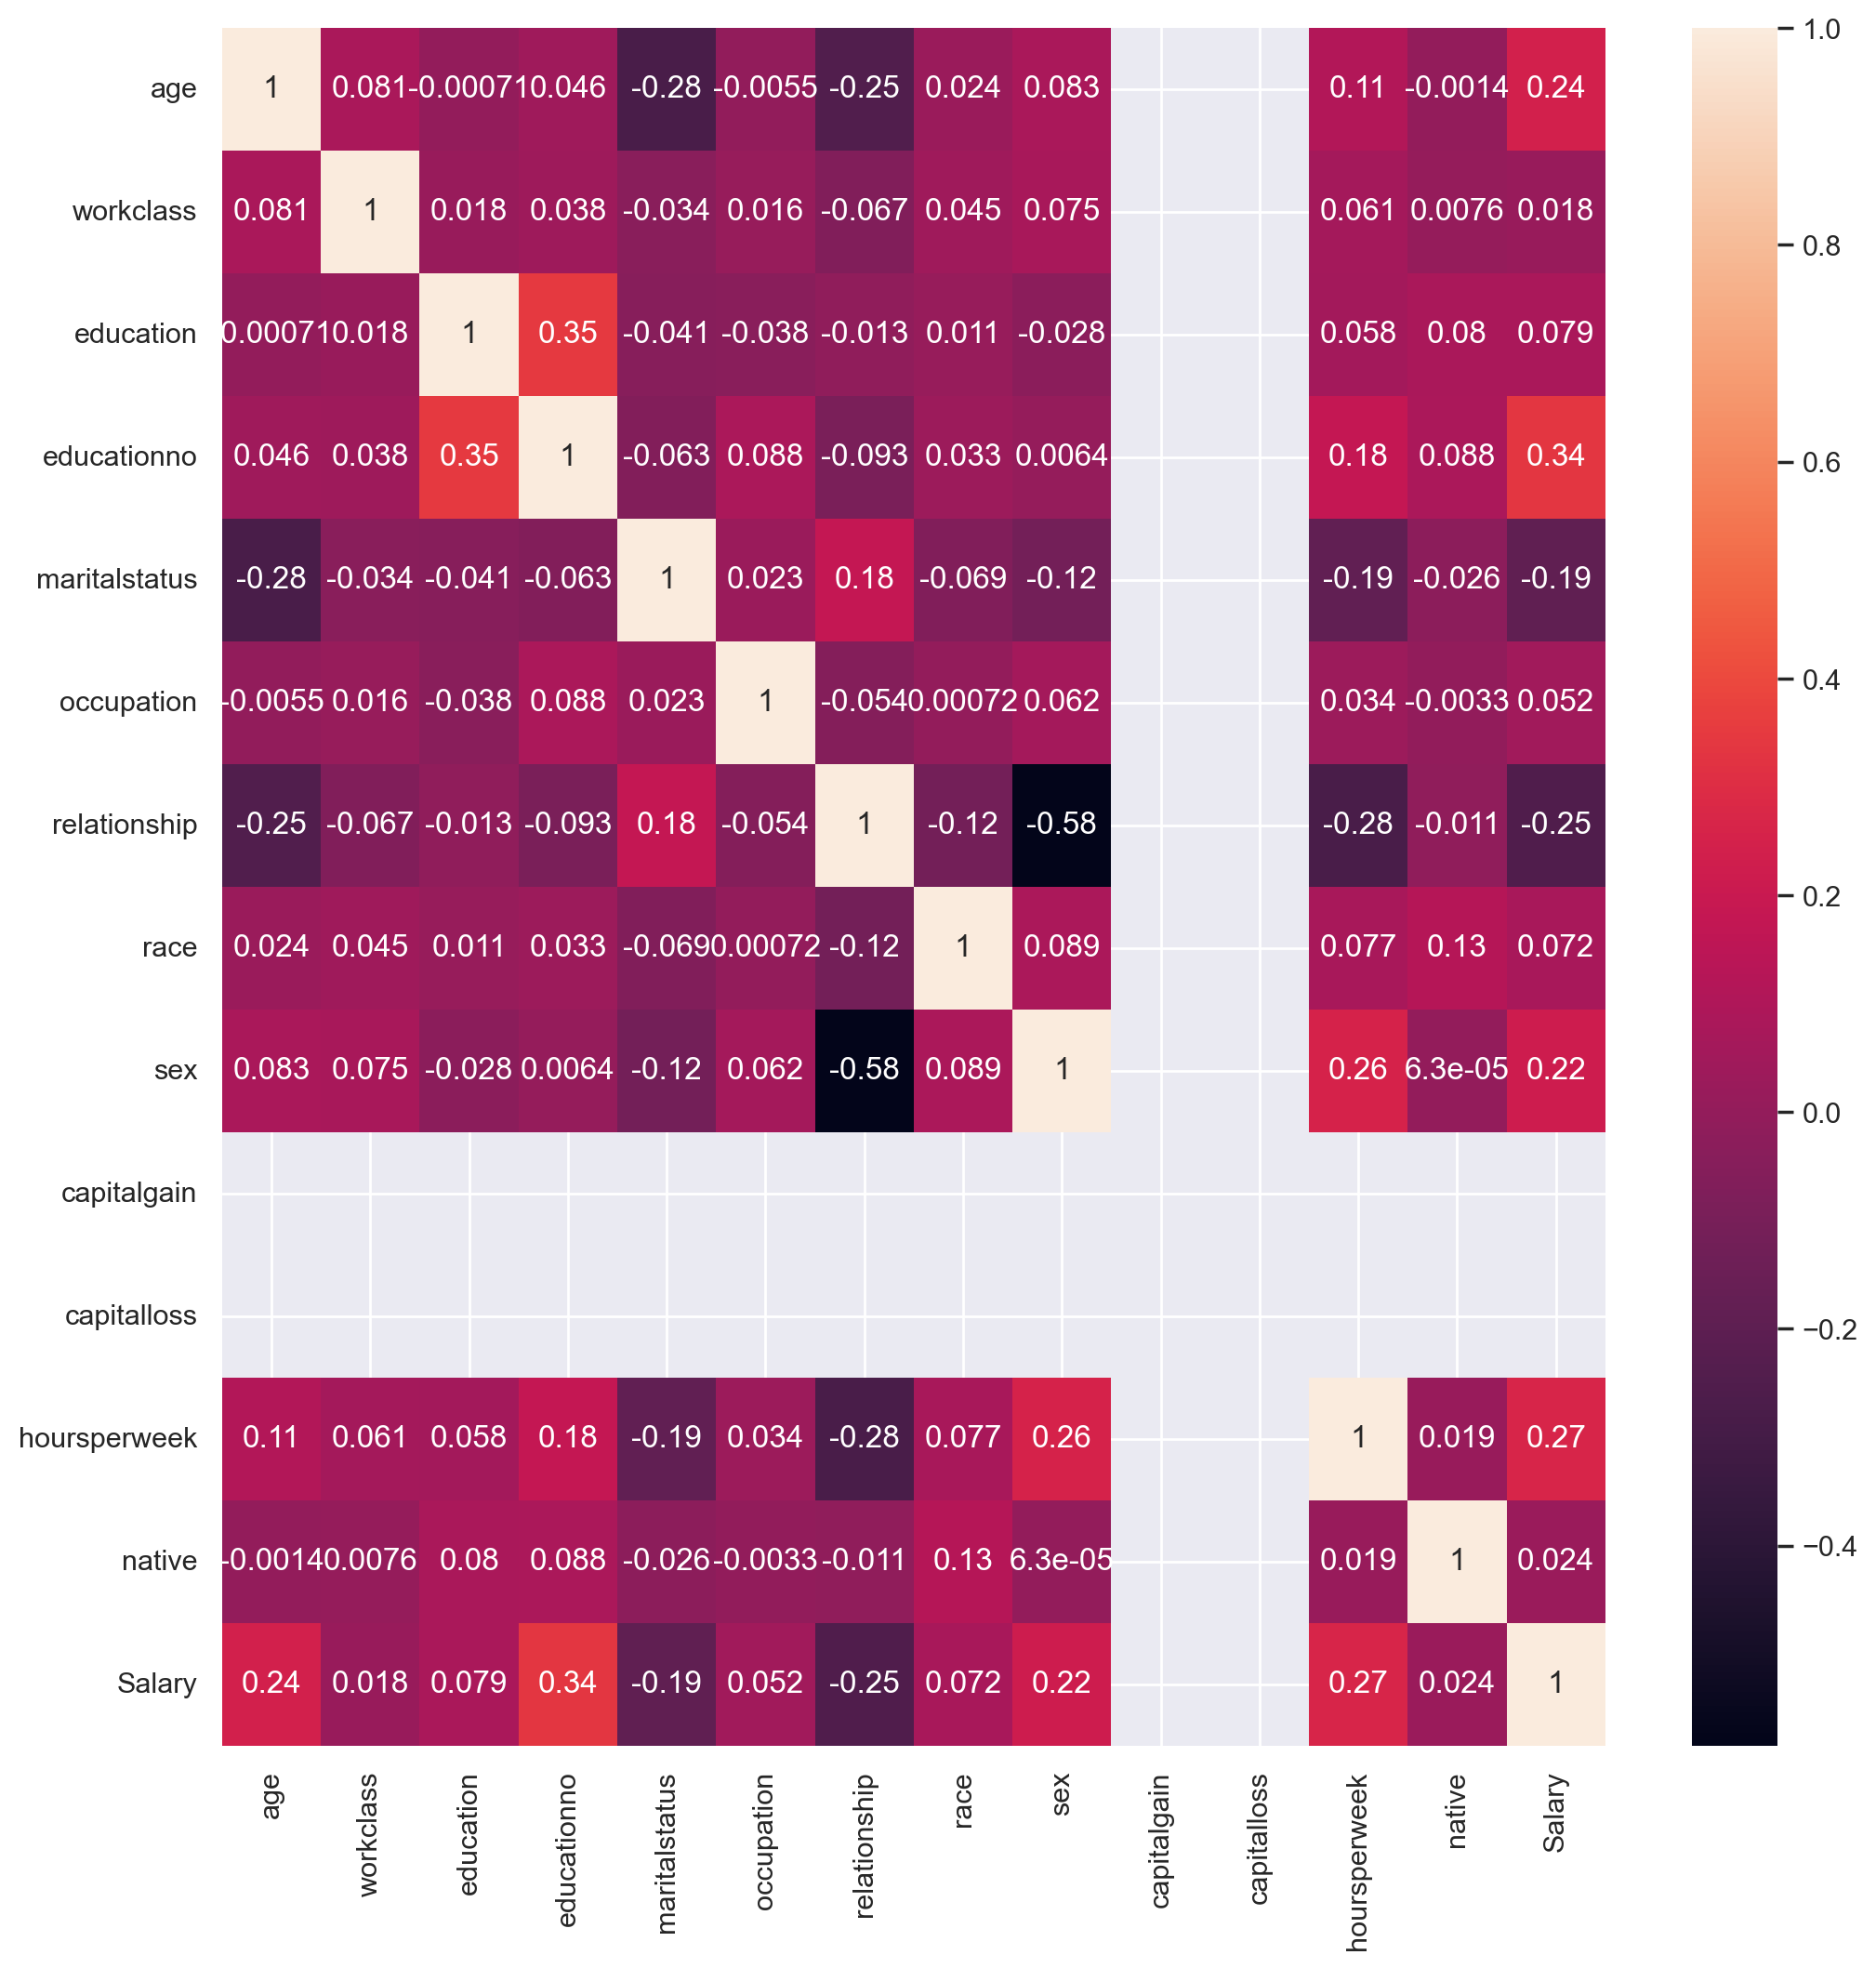

In [29]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot=True)

In [30]:
df.drop('capitalloss', inplace=True, axis = 1)
df.drop('capitalgain', inplace=True, axis = 1)

## Test Data Prep

In [31]:
test = pd.read_csv('SalaryData_Test(1).csv')
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## EDA

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [33]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [34]:
test.describe(include = object)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
count,15060,15060,15060,15060,15060,15060,15060,15060,15060
unique,7,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
freq,11021,4943,6990,1992,6203,12970,10147,13788,11360


**Missing values check**

In [35]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

**checking object type column for inconsistent entries**

In [36]:
test['workclass'].unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [37]:
test['education'].unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
       ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [38]:
test['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated',
       ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [39]:
test['occupation'].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [40]:
test['relationship'].unique()

array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
       ' Other-relative'], dtype=object)

In [41]:
test['race'].unique()

array([' Black', ' White', ' Other', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander'], dtype=object)

In [42]:
test['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [43]:
test['native'].unique()

array([' United-States', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object)

In [44]:
test['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

**Outlier Handeling**

Text(0.5, 1.0, 'boxplot')

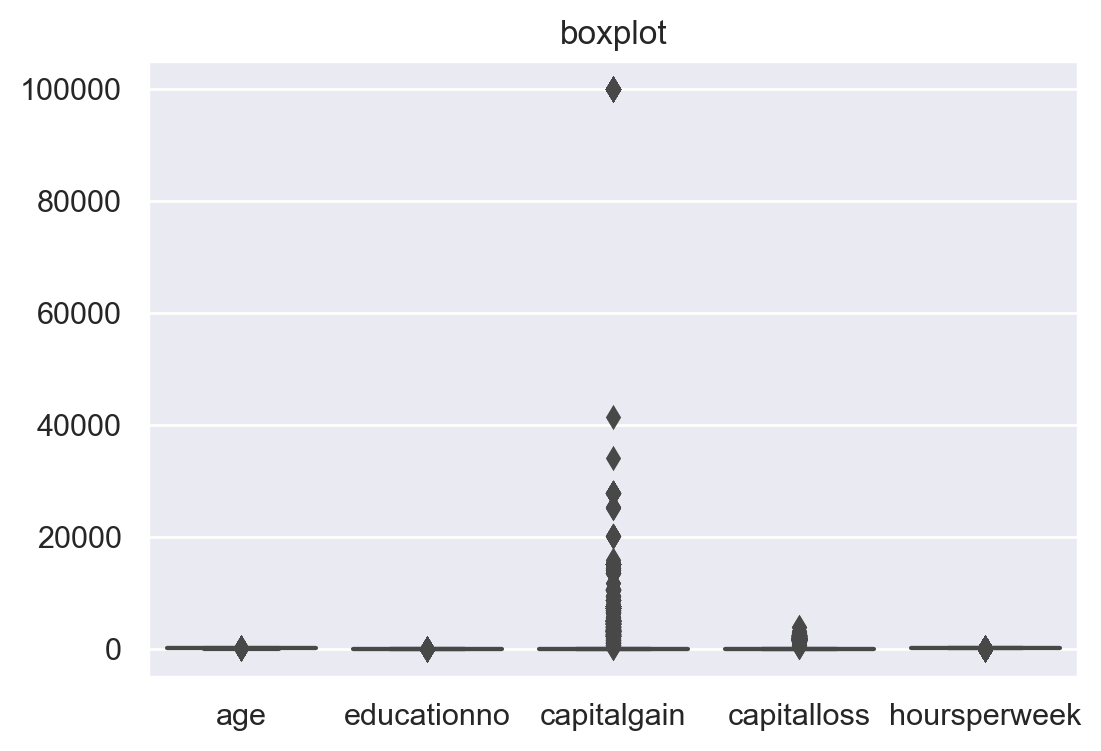

In [45]:
sns.boxplot(data = test)
plt.title('boxplot')

Text(0.5, 1.0, 'zoomed-in boxplot')

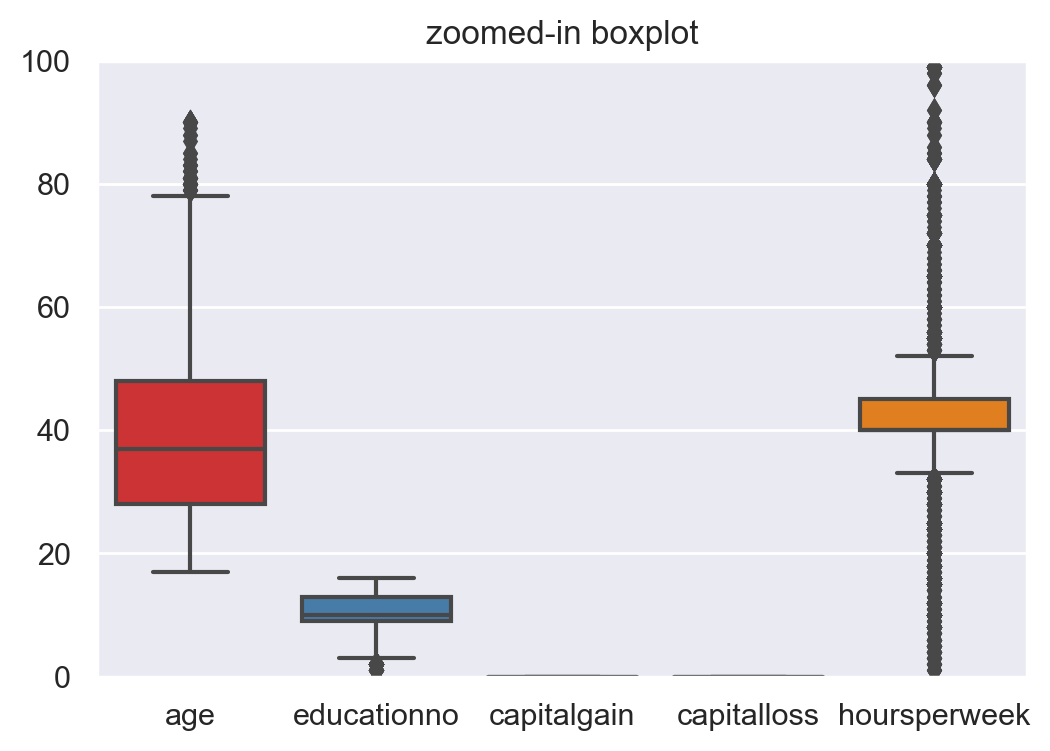

In [46]:
sns.boxplot(data = test)
plt.ylim(0,100)
plt.title('zoomed-in boxplot')

In [47]:
def outlier_remove(test, col):
    q1 = test[col].quantile(0.25)
    q3 = test[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    test.loc[test[col]>upper,col] = upper
    test.loc[test[col]<lower,col] = lower
outlier_remove(test = test,col = 'age')
outlier_remove(test = test,col = 'educationno')
outlier_remove(test = test,col = 'capitalgain')
outlier_remove(test = test,col = 'capitalloss')
outlier_remove(test = test,col = 'hoursperweek')

Text(0.5, 1.0, 'outlier removed train data boxplot')

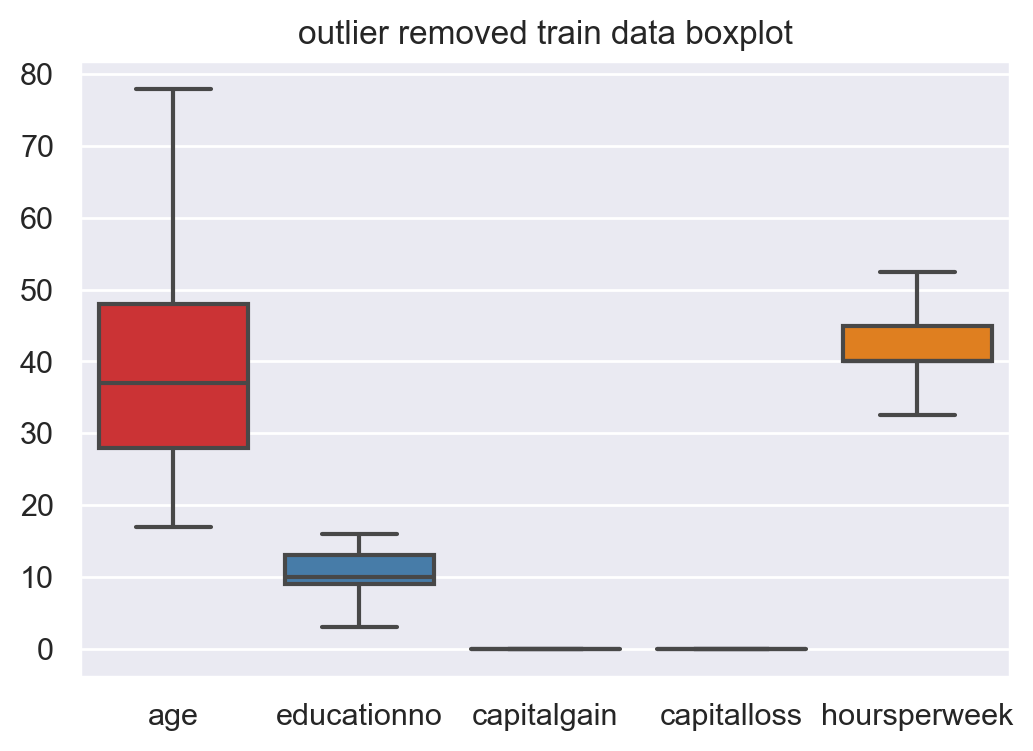

In [48]:
sns.boxplot(data = test)
plt.title('outlier removed train data boxplot')

## Visualizations

In [49]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,32.5,United-States,<=50K


In [50]:
high_sal = test[test['Salary'] == ' >50K']
low_sal = test[test['Salary'] == ' <=50K']

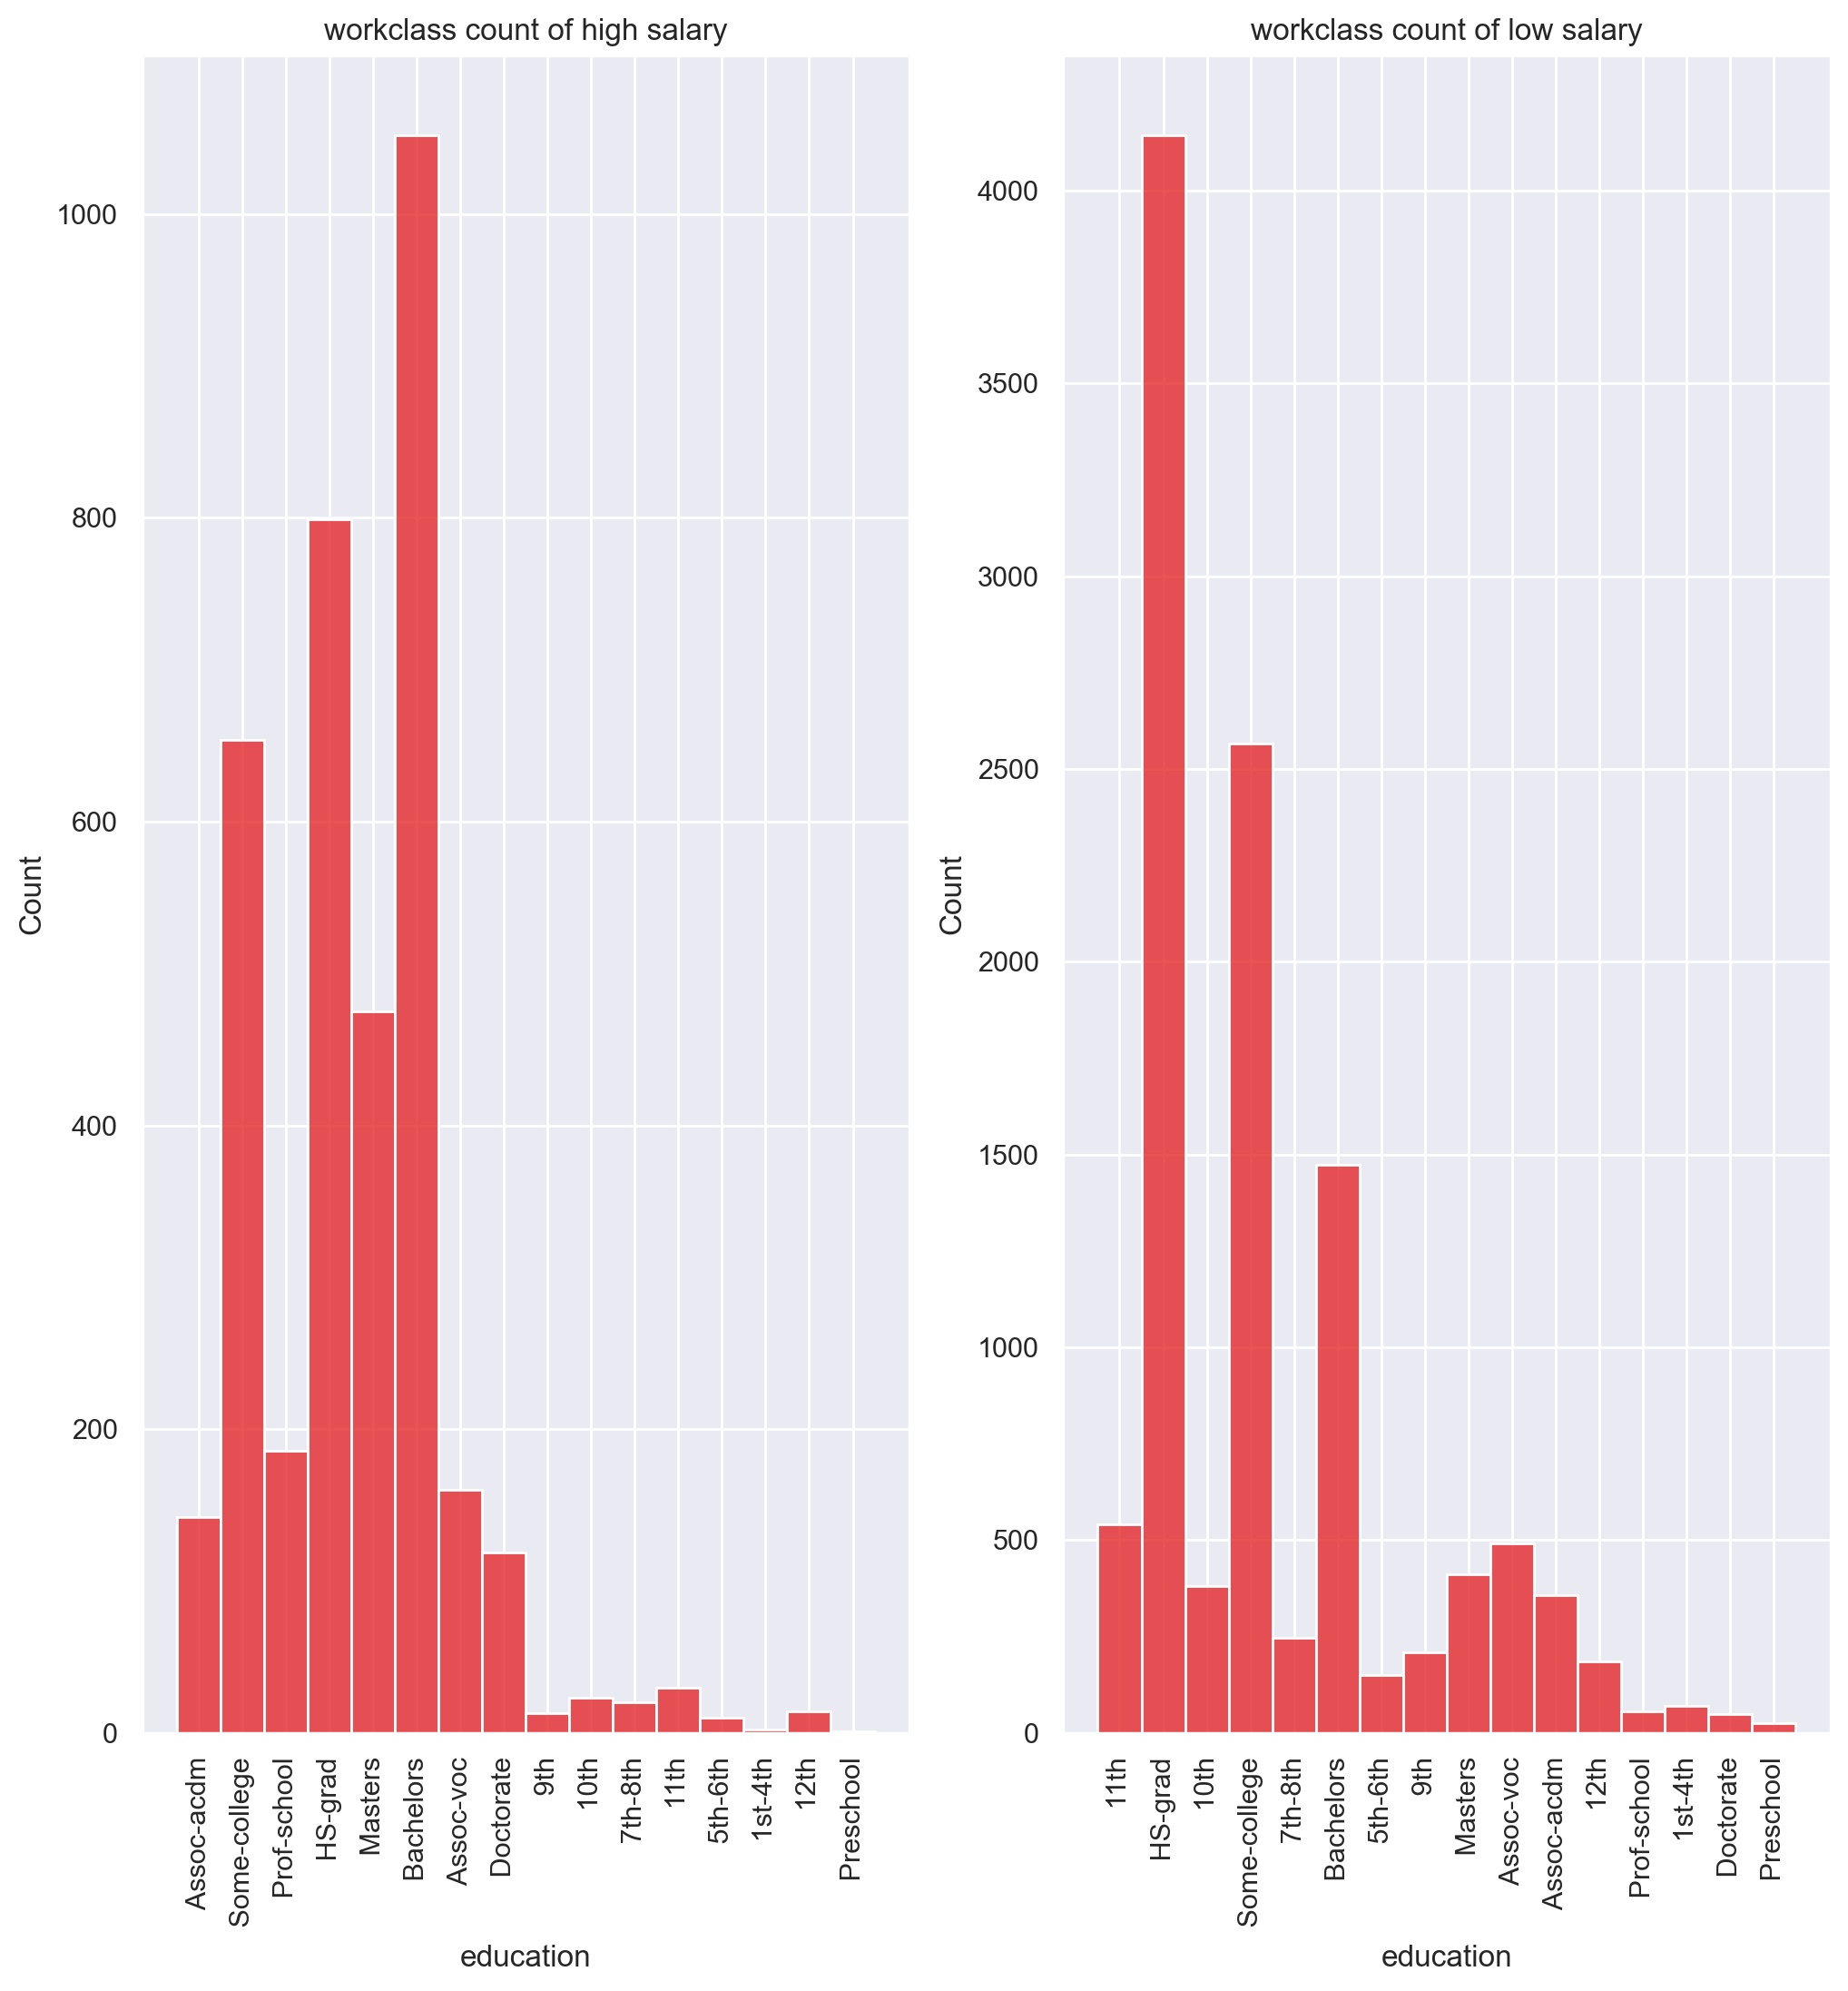

In [51]:
plt.figure(figsize = (12,12))
plt.subplot(1,2,1)
sns.histplot(data = high_sal, x = 'education')
plt.xticks(rotation = 90)
plt.title('workclass count of high salary')

plt.subplot(1,2,2)
sns.histplot(data = low_sal, x = 'education')
plt.xticks(rotation = 90)
plt.title('workclass count of low salary')
plt.show()

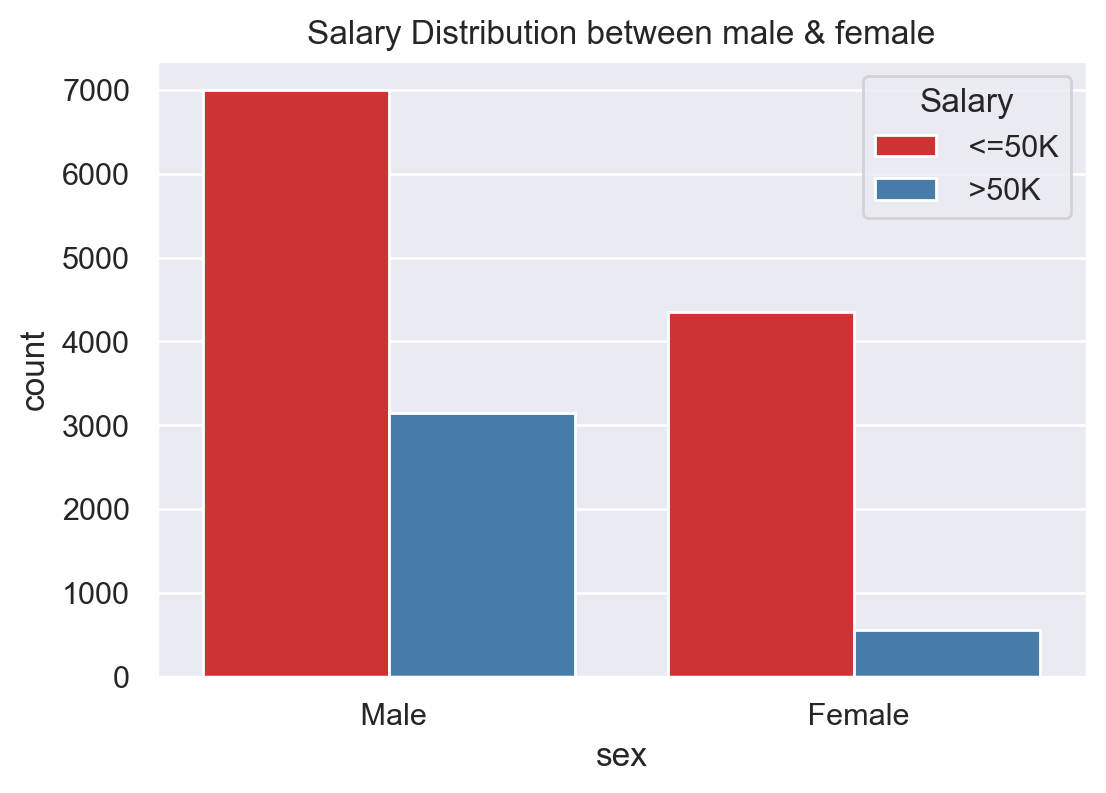

In [52]:
sns.countplot(data = test, x = 'sex', hue = 'Salary')
plt.title('Salary Distribution between male & female')
plt.show()

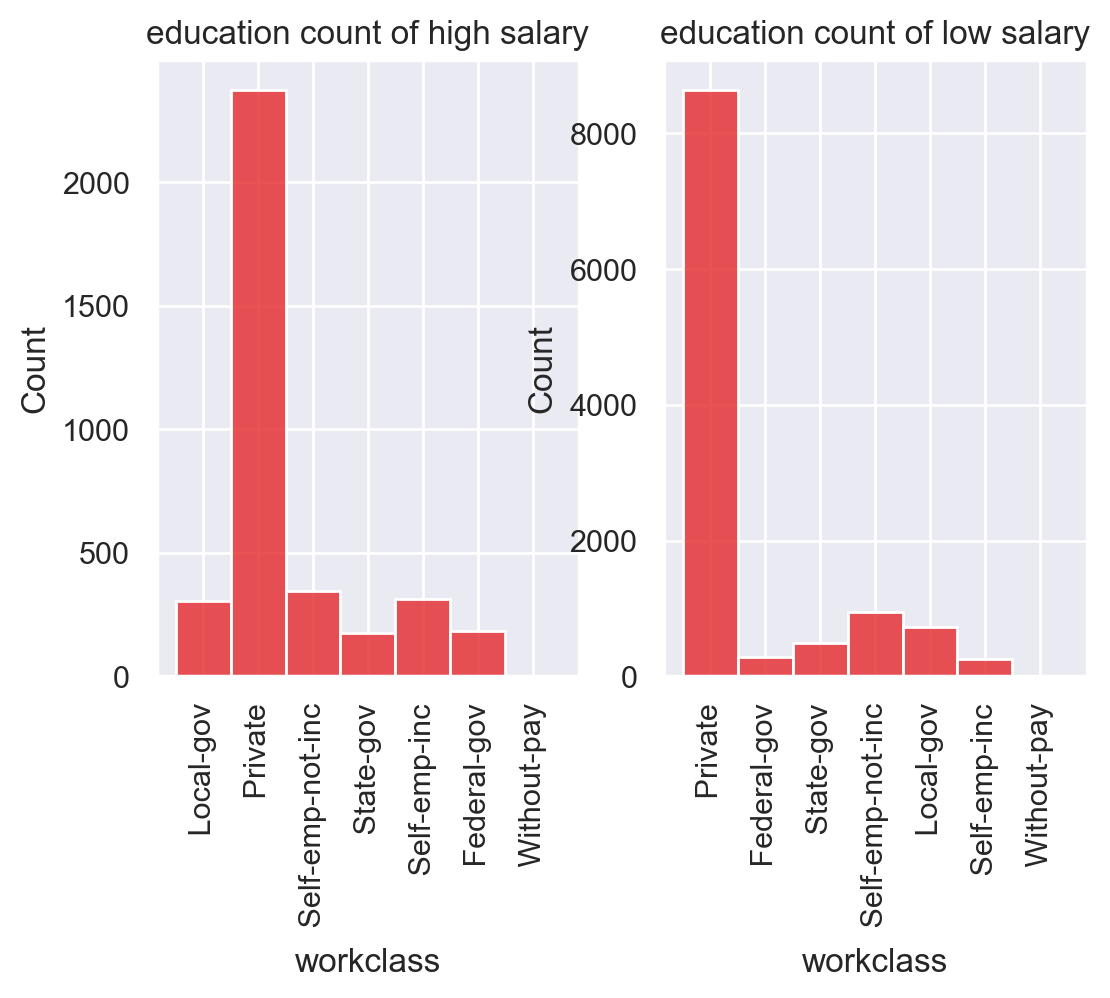

In [53]:
plt.subplot(1,2,1)
sns.histplot(data = high_sal, x = 'workclass')
plt.xticks(rotation = 90)
plt.title('education count of high salary')
plt.subplot(1,2,2)
sns.histplot(data = low_sal, x = 'workclass')
plt.xticks(rotation = 90)
plt.title('education count of low salary')
plt.show()

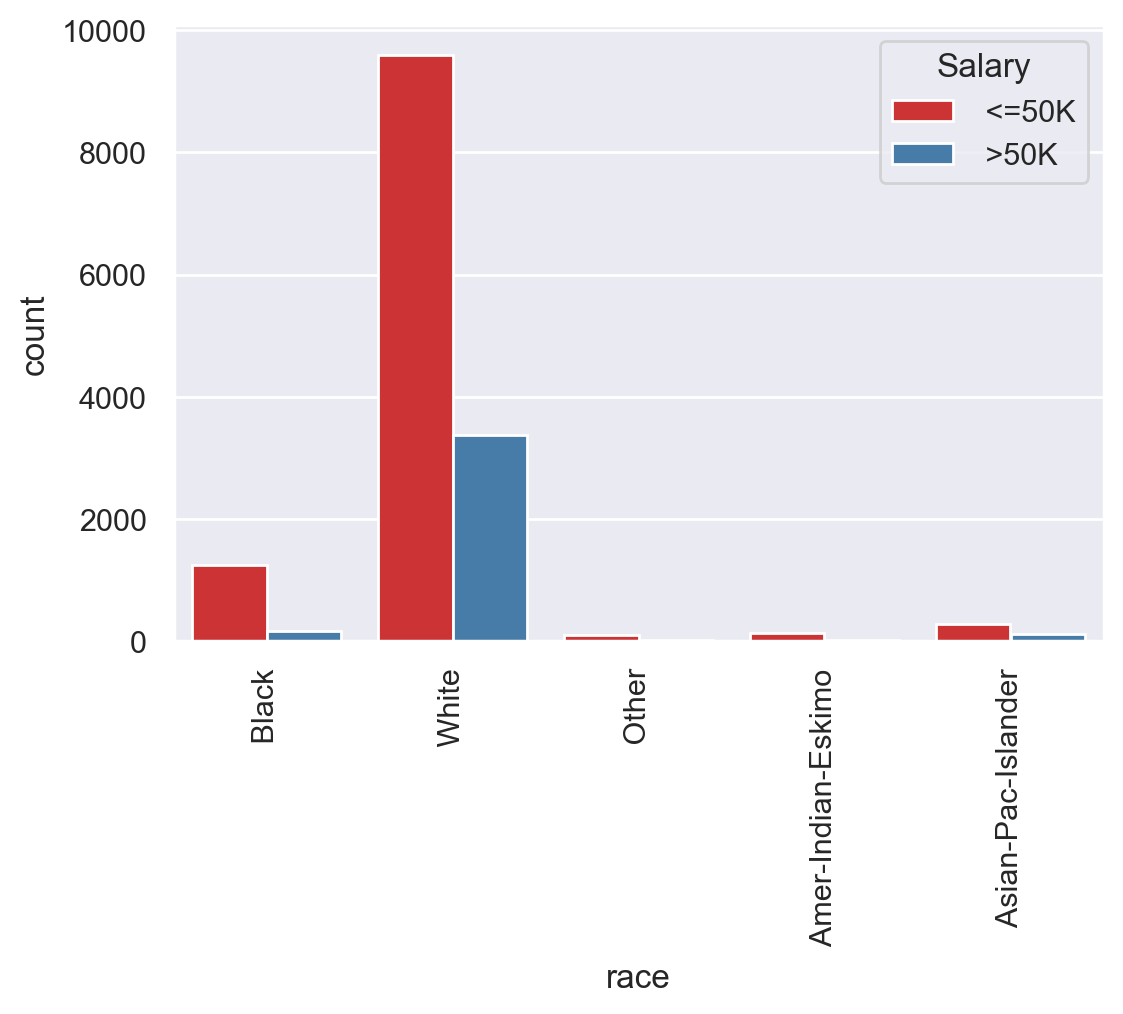

In [54]:
sns.countplot(data = test, x = 'race', hue = "Salary")
plt.xticks(rotation = 90)
plt.show()

**Label Encoding**

In [55]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
for col in test.columns:
    if test[col].dtype == 'object':  # Check if the column contains categorical data
        test[col] = label_encoder.fit_transform(test[col])

In [56]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40.0,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50.0,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40.0,37,1
3,44,2,15,10,2,6,0,2,1,0,0,40.0,37,1
4,34,2,0,6,4,7,1,4,1,0,0,32.5,37,0


In [57]:
for column in test.columns:
    unique_values = test[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'age': [25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 78
 62 35 72 64 68 66 60 67 71 70 77 74 75 76]
Unique values in 'workclass': [2 1 4 0 5 3 6]
Unique values in 'education': [ 1 11  7 15  0 14  5  9 12  4  8  6 10  2  3 13]
Unique values in 'educationno': [ 7  9 12 10  6 15  4 13 14  3 11  5 16  8]
Unique values in 'maritalstatus': [4 2 6 5 0 3 1]
Unique values in 'occupation': [ 6  4 10  7  9  2  0  3 12 11  8 13  5  1]
Unique values in 'relationship': [3 0 1 4 5 2]
Unique values in 'race': [2 4 3 0 1]
Unique values in 'sex': [1 0]
Unique values in 'capitalgain': [0]
Unique values in 'capitalloss': [0]
Unique values in 'hoursperweek': [40.  50.  32.5 39.  48.  47.  35.  43.  52.5 38.  45.  36.  44.  41.
 33.  37.  52.  42.  46.  49.  34.  51. ]
Unique values in 'native': [37 27 12 24  5 19 10 28 35 13  7 31 38 33  3 22 17  0 29 23  8  4 34 20
  1 30  2 25 14 18 32 21  6 

**Correlation**

<Axes: >

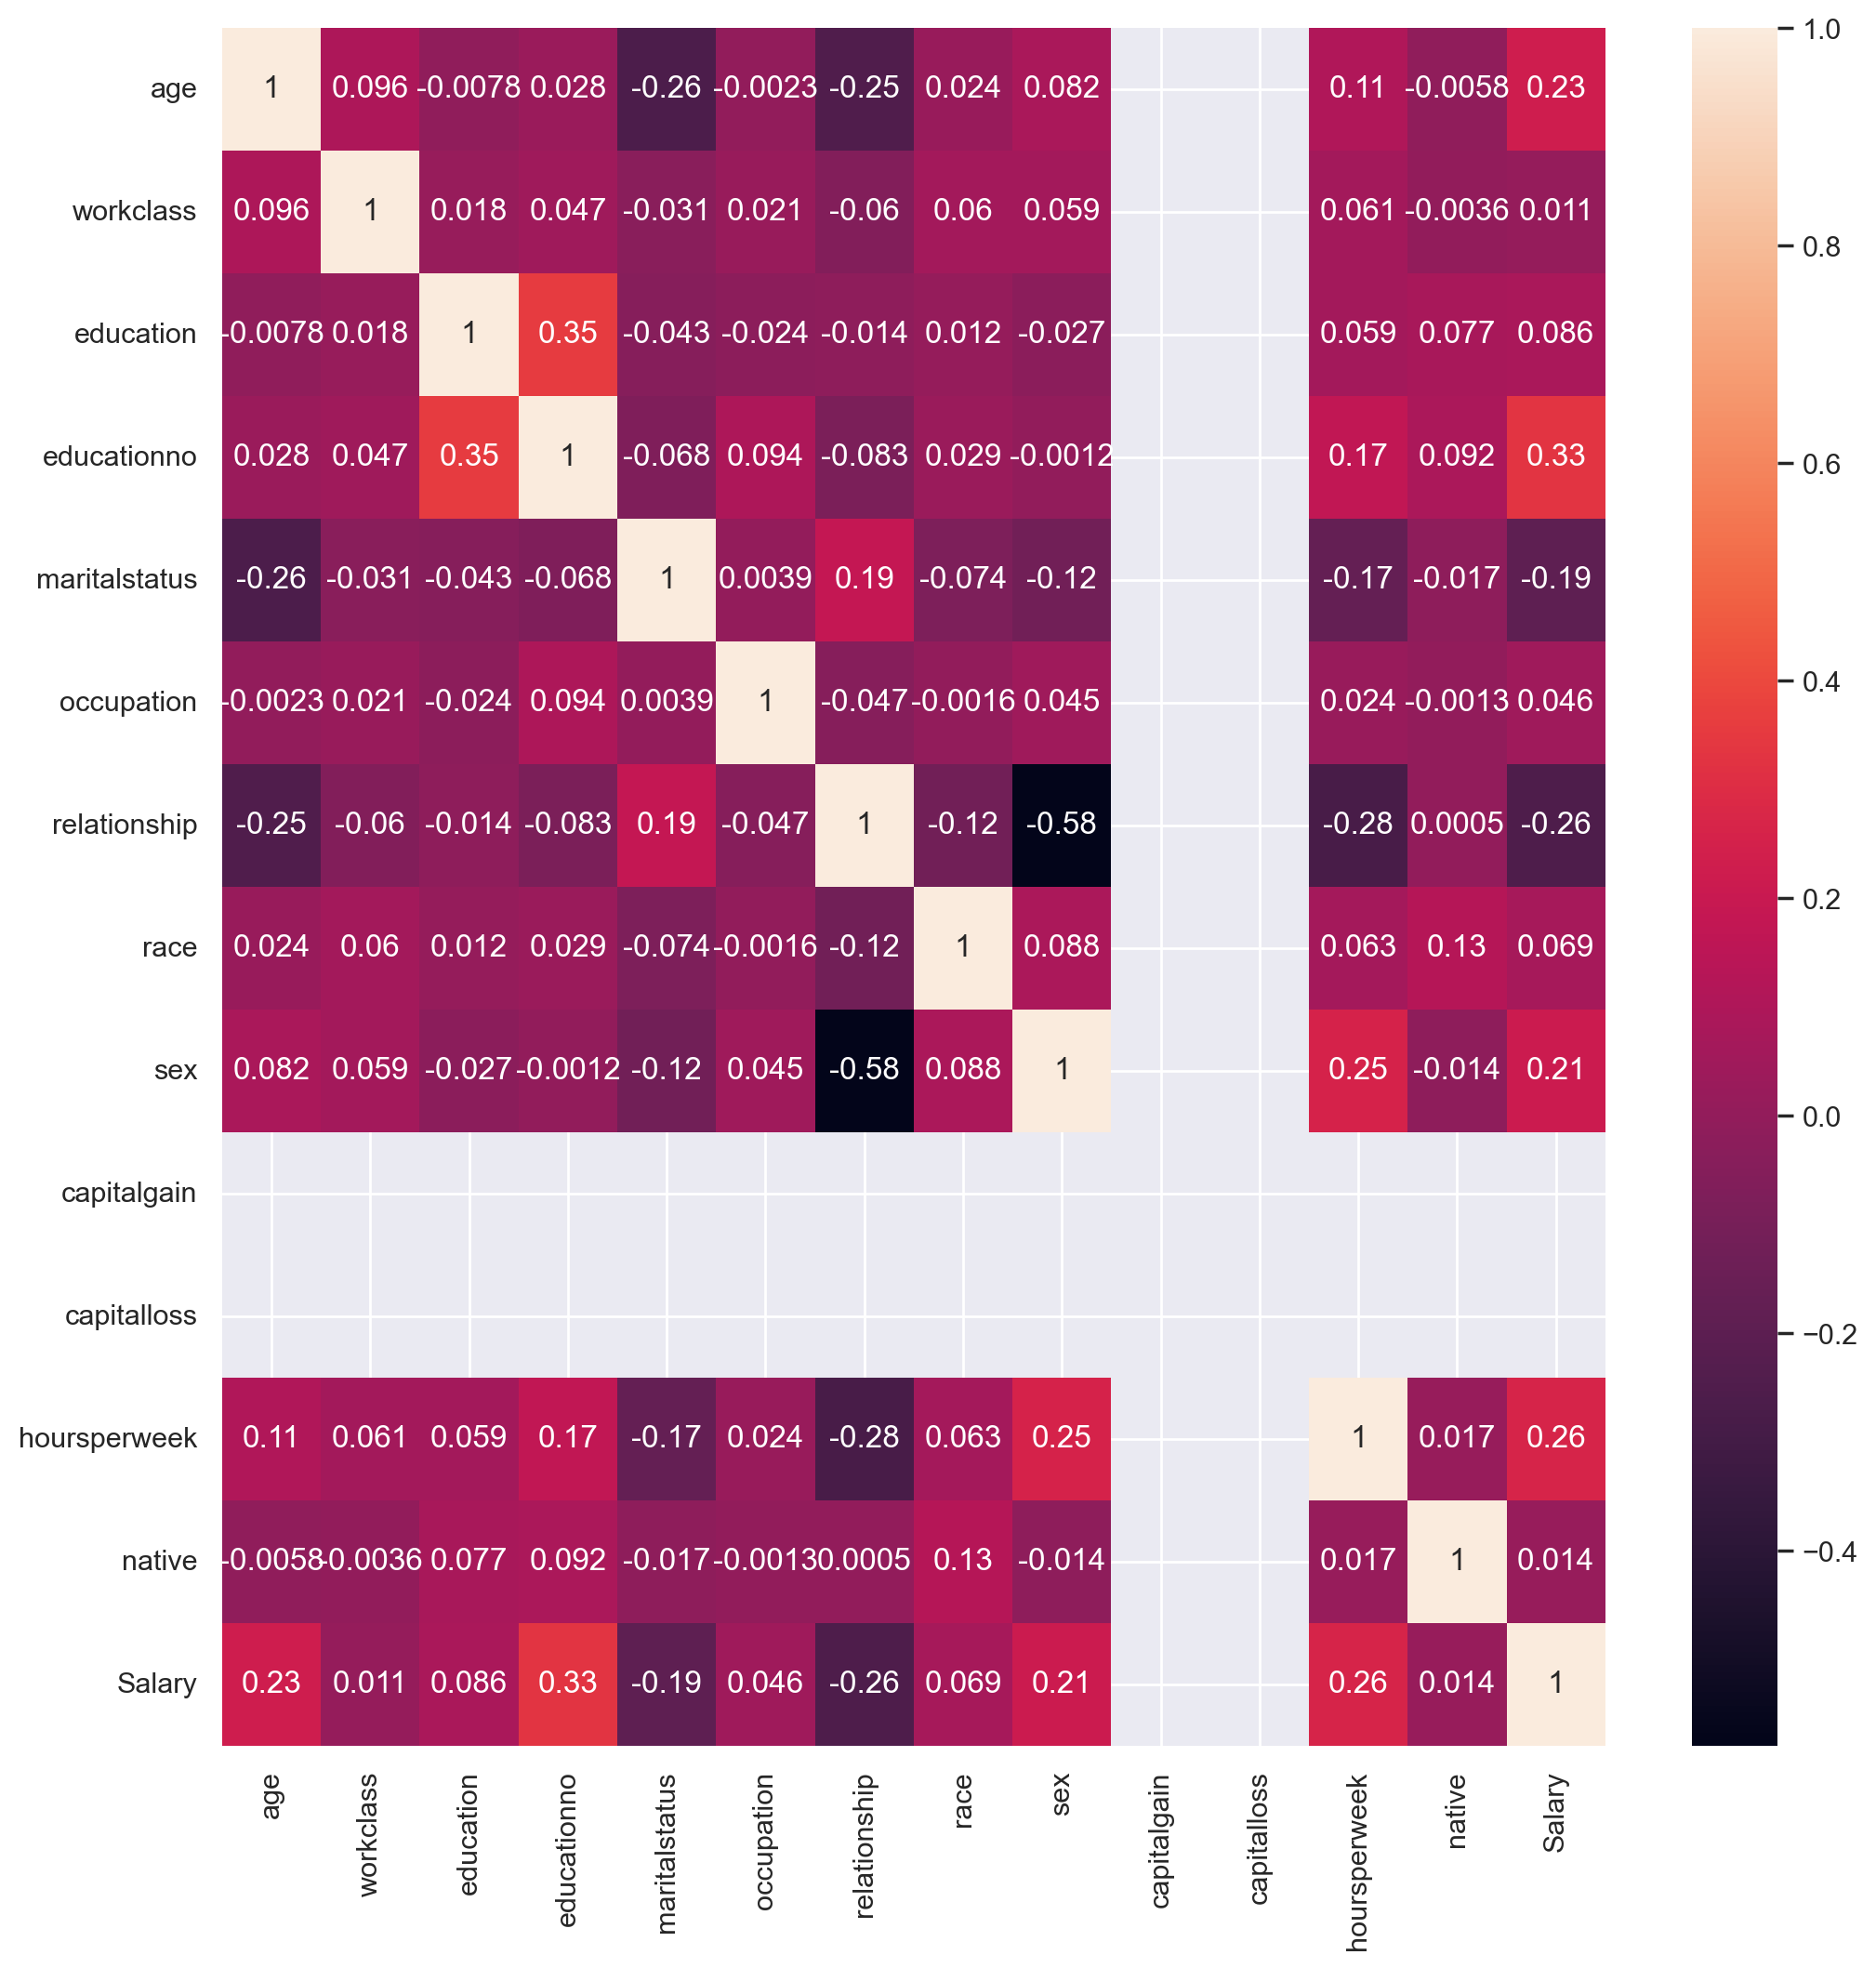

In [58]:
plt.figure(figsize = (12,12))
sns.heatmap(test.corr(), annot=True)

In [59]:
test.drop('capitalloss', inplace=True, axis = 1)
test.drop('capitalgain', inplace=True, axis = 1)

In [60]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,40.0,37,0
1,38,2,11,9,2,4,0,4,1,50.0,37,0
2,28,1,7,12,2,10,0,4,1,40.0,37,1
3,44,2,15,10,2,6,0,2,1,40.0,37,1
4,34,2,0,6,4,7,1,4,1,32.5,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,40.0,37,0
15056,39,2,9,13,0,9,1,4,0,36.0,37,0
15057,38,2,9,13,2,9,0,4,1,50.0,37,0
15058,44,2,9,13,0,0,3,1,1,40.0,37,0


In [63]:
preprocessed_test = test
preprocessed_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,40.0,37,0
1,38,2,11,9,2,4,0,4,1,50.0,37,0
2,28,1,7,12,2,10,0,4,1,40.0,37,1
3,44,2,15,10,2,6,0,2,1,40.0,37,1
4,34,2,0,6,4,7,1,4,1,32.5,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,40.0,37,0
15056,39,2,9,13,0,9,1,4,0,36.0,37,0
15057,38,2,9,13,2,9,0,4,1,50.0,37,0
15058,44,2,9,13,0,0,3,1,1,40.0,37,0


## model training

**Data splitting**

In [65]:
# train data
x_train = df.drop(columns=["Salary"])
y_train = df["Salary"]

# test data
x_test = preprocessed_test.drop(columns=["Salary"])
y_test = preprocessed_test["Salary"]

**Data Stadardization**

In [66]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
help(SVC)

**Creating a base model on default hyperparameter**

In [67]:
svc = SVC()
svc.fit(x_train, y_train)
base_pred = svc.predict(x_test)
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     11360
           1       0.70      0.50      0.58      3700

    accuracy                           0.82     15060
   macro avg       0.78      0.71      0.73     15060
weighted avg       0.81      0.82      0.81     15060



**Using Grid Search method to findout best performing hyperparameters**

In [68]:
param_grid = {'C' : [0.1,0.5,0.9],
              'kernel':['rbf','linear']}
svc = SVC(kernel='linear')

In [ ]:
grid_model = GridSearchCV(estimator=svc, param_grid=param_grid, cv = 5)
grid_model.fit(x_train,y_train)

In [ ]:
#check best best perfroming estimators
grid_model.best_estimator_

In [ ]:
# checking best perfroming hyperparamerter values for SVM
grid_model.best_params_

In [ ]:
# predictions on test data
final_pred = grid_model.predict(x_test)

In [ ]:
#c lassification report
print(classification_report(y_test,final_pred))